# Grey Approximation for the Solar Temperature Profile

In [1]:
%matplotlib inline
import os
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import rc
from astroML.plotting import setup_text_plots
import pdb
setup_text_plots(fontsize=25, usetex=True)

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rcParams['font.size'] = 25.0

## Get data from http://www.staff.science.uu.nl/~rutte101/rrweb/rjr-edu/exercises/ssb/

In [3]:
! head falc.dat

FALC solar model atmosphere of Fontenla, Avrett & Loeser 1993ApJ...406..319F; 82 heights top-to-bottom
 height   tau_500    colmass    temp    v_turb n_Htotal   n_proton   n_electron pressure  p_gas/p  density
 [km]     dimless    [g/cm^2]   [K]     [km/s] [cm^-3]    [cm^-3]    [cm^-3]    [dyn/cm2] ratio    [g/cm^3]
 
 2218.20  0.000E+00  6.777E-06  100000  11.73  5.575E+09  5.575E+09  6.665E+09  1.857E-01  0.952  1.306E-14
 2216.50  7.696E-10  6.779E-06   95600  11.65  5.838E+09  5.837E+09  6.947E+09  1.857E-01  0.950  1.368E-14
 2214.89  1.531E-09  6.781E-06   90816  11.56  6.151E+09  6.150E+09  7.284E+09  1.858E-01  0.948  1.441E-14
 2212.77  2.597E-09  6.785E-06   83891  11.42  6.668E+09  6.667E+09  7.834E+09  1.859E-01  0.945  1.562E-14
 2210.64  3.754E-09  6.788E-06   75934  11.25  7.381E+09  7.378E+09  8.576E+09  1.860E-01  0.941  1.729E-14
 2209.57  4.384E-09  6.790E-06   71336  11.14  7.864E+09  7.858E+09  9.076E+09  1.860E-01  0.938  1.843E-14


In [34]:
dat = np.genfromtxt('falc.dat', skip_header=4)
h, tau500,cm,T = dat[:,0], dat[:,1], dat[:,2], dat[:,3]

## Compute grey temperature profile  

$$ T_{grey} = T_{eff} \left (\frac{2}{3} \tau_{500} + \frac{1}{2} \right ) $$

In [35]:
Tgrey = 5770. * (0.75 * tau500 + 0.5)

## Plot it up!

/astro/users/jlustigy/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/astro/users/jlustigy/.conda/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log10


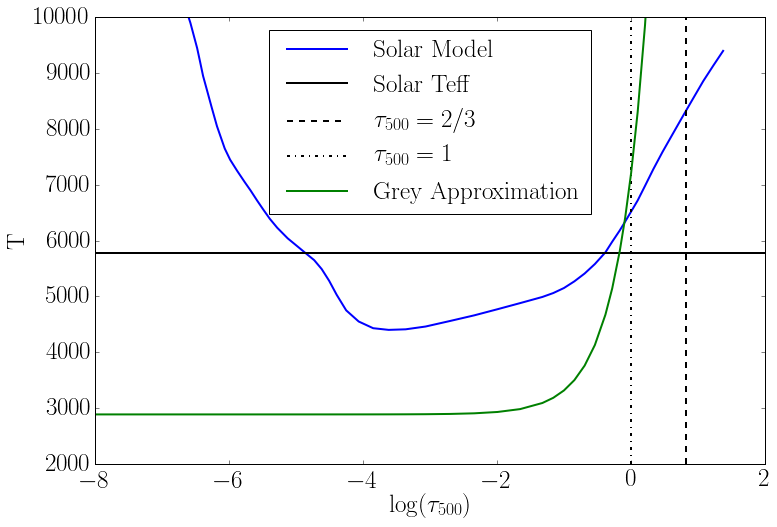

In [36]:
fig = plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(1,1) 
ax0 = plt.subplot(gs[0])

ax0.plot(np.log10(tau500),T, lw=2, label='Solar Model'); 
ax0.set_xlabel(r'$\log ( \tau_{500} )$'); 
ax0.set_ylabel(r'T'); 
ax0.set_ylim([2000,10000])
ax0.set_xlim([-8,2])
ax0.axhline(5770, c='k', ls='-', lw=2, label='Solar Teff'); 
ax0.axvline(np.log10(2./.3), c='k', ls='--', lw=2, label=r'$\tau_{500}=2/3$'); 
ax0.axvline(np.log10(1), c='k', ls='-.', lw=2, label=r'$\tau_{500}=1$')
ax0.plot(np.log10(tau500),Tgrey, lw=2, label='Grey Approximation')
ax0.legend(loc=0)
fig.show()